In [1]:
#导入包
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image

In [7]:
#读取图片,并且把图片变为np.array
image_path='test.jpg'
image=Image.open(image_path).convert('L')
image=np.array(image)
width,height=image.shape
print(width,height)
print(image)

1080 1920
[[142 131 121 ... 238 237 237]
 [135 125 113 ... 236 236 236]
 [135 123 110 ... 235 236 236]
 ...
 [185 186 187 ...  91  93  91]
 [187 187 187 ...  83  82  86]
 [184 191 191 ...  96  96 101]]


In [46]:
# 参数设置
block_size = 120  # 小块大小
n_components = 120  # 主成分数量

In [47]:
#步骤一 把图片变成小块
blocks = []
for i in range (0,width,block_size):
    for j in range(0,height,block_size):
        block=image[i:i+block_size,j:j+block_size]
        # if block.shape==(block_size,block_size):
        if block.shape != (block_size,block_size):
            print(i,j)
            # print(block.shape)
        blocks.append(block.flatten())
blocks=np.array(blocks)
print(blocks[:1])
print(blocks.shape)

[[142 131 121 ... 246 247 246]]
(144, 14400)


In [48]:
# --- 步骤2: 标准化数据 ---
scaler = StandardScaler()
blocks_scaled = scaler.fit_transform(blocks)
print(blocks_scaled[:1])
print(blocks_scaled.shape)

[[-0.57525685 -0.81512746 -1.00382748 ...  1.22415027  1.23602935
   1.29214289]]
(144, 14400)


In [49]:
# --- 步骤3: 应用PCA ---
pca = PCA(n_components=n_components)
features = pca.fit_transform(blocks_scaled)

In [50]:
# --- 步骤4: 生成特征图（以第一主成分为例） ---
feature_map = features[:, 0].reshape((height//block_size, width//block_size))
print(feature_map)

[[   6.79318934  -39.6114377     6.64876074  -69.68032536  -94.11314395
   -80.01037295  -79.50213026  -79.34604089   -4.13664084]
 [  35.84443047  111.76940056  125.64889642  125.09317361  115.79160862
   114.43856397  113.64778914   77.59418874   38.51616792]
 [ -18.42959279    4.94757558   14.35487987   40.09070113   15.43599026
    50.40742581   68.84380431   86.48842129   92.88684466]
 [ 116.26269747   77.50466642   65.85434947   74.99246908   71.78448165
    45.14190822   41.11604488   63.91996905   -9.68908707]
 [  16.9440243    55.9957921     0.3777747    33.51803027   18.19849621
     2.14893003   85.37852548   95.32754388  110.87393054]
 [  97.79638182   91.6505662    55.86708723   73.68007935    7.65798894
     2.52497748    0.48977786    1.84286095   28.77600407]
 [   6.39425037   49.78124301  -67.00481585  -36.36185111   76.94171766
    66.66144915  112.04930633  112.80921763   98.01941402]
 [  92.17562456  -29.65720685  -68.53868013  -23.66611729  -57.31565504
    -1.5628

C:\Users\21009\AppData\Local\Temp\ipykernel_6652\2763742911.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i+1)


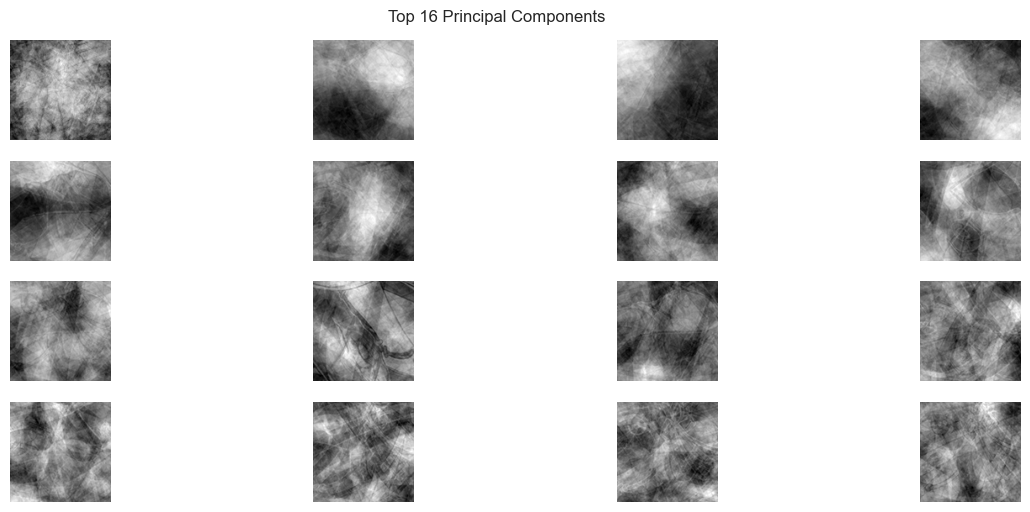

In [53]:
# --- 步骤5: 可视化结果 ---
plt.figure(figsize=(15, 6))

# 原始图像
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 特征图（第一主成分）
plt.subplot(1, 3, 2)
plt.imshow(feature_map, cmap='jet')
plt.title('Feature Map (1st PC)')
plt.colorbar()
plt.axis('off')

# 主成分可视化（前16个主成分）
plt.subplot(1, 3, 3)
for i in range(min(16, n_components)):
    pc = pca.components_[i].reshape(block_size, block_size)
    plt.subplot(4, 4, i+1)
    plt.imshow(pc, cmap='gray')
    plt.axis('off')
plt.suptitle('Top 16 Principal Components', y=0.93)
plt.show()